In [1]:
import numpy as np, math, matplotlib.pyplot as plt

In [2]:
point1 = [1., 1.]
point2 = [1., 2.]
point3 = [1.5, 1.5]

In [3]:
def Rot(T):
    return np.matrix([[math.cos(T), -math.sin(T)], [math.sin(T), math.cos(T)]])

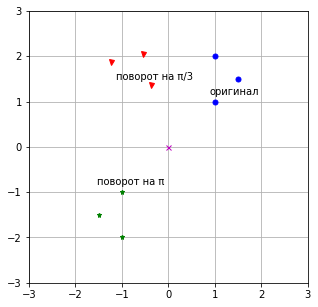

In [4]:
points = np.matrix([point1, point2, point3]).T
rotated1Points = Rot(3.14) * points
rotated2Points = Rot(3.14 / 3) * points

plt.figure(figsize=(5,5))
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.grid(True)
plt.plot([0], [0], 'mx', markersize=5)
plt.plot(points[0].A[0], points[1].A[0], 'bo', markersize=5)
plt.annotate("оригинал", xy=points[:,0], xytext=(-5, 7), textcoords='offset points')
plt.plot(rotated1Points[0].A[0], rotated1Points[1].A[0], 'g*', markersize=5)
plt.annotate("поворот на π", xy=rotated1Points[:,0], xytext=(-25, 7), textcoords='offset points')
plt.plot(rotated2Points[0].A[0], rotated2Points[1].A[0], 'rv', markersize=5)
plt.annotate("поворот на π/3", xy=rotated2Points[:,0], xytext=(-35, 5), textcoords='offset points')


plt.show()

In [5]:
def R(T):
    return np.matrix([[math.cos(T), math.sin(T), 0], [-math.sin(T), math.cos(T), 0], [0, 0, 1]])

def T(x, y):
    return np.matrix([[1, 0, x], [0, 1, y], [0, 0, 1]])

def Z(tx, ty):
    return np.matrix([[tx, 0, 0], [0, ty, 0], [0, 0, 1]])

def M(t, dx, dy, tx, ty):
    return  Z(dx, dy) * R(t) * T(tx, ty)

points = np.matrix([[1.1, 1.1, 1.], [1.1, -1.1, 1.], [-1.1, -1.1, 1.], [-1.1, 1.1, 1.], [1.1, 1.1, 1.]]).T
# передвинули на (1.5, 0.5), повернули на 30 градусов, растянули по x
angle, zoom, move = 3.14 / 3, (0.5, 1.5), (3., 3.)
points_a = T(*move) * points
points_b = R(angle) * T(*move) * points
points_c = M(angle, *zoom, *move) * points

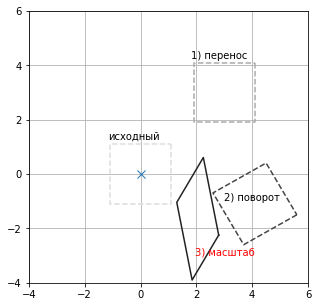

In [6]:
plt.figure(figsize=(5,5))
plt.xlim(-4, 6)
plt.ylim(-4, 6)

plt.grid(True)
plt.plot(points[0].A[0], points[1].A[0], color="#DDDDDD",linestyle='--')
plt.annotate("исходный", xy=(-1,1), xytext=(-5, 7), textcoords='offset points')
plt.plot(points_a[0].A[0], points_a[1].A[0], color="#AAAAAA",linestyle='--')
plt.annotate("1) перенос", xy=(2,4), xytext=(-5, 7), textcoords='offset points')
plt.plot(points_b[0].A[0], points_b[1].A[0], color="#444444",linestyle='--')
plt.annotate("2) поворот", xy=(3,-1), xytext=(0, 0), textcoords='offset points')
plt.plot(points_c[0].A[0], points_c[1].A[0], color="#222222")
plt.annotate("3) масштаб", xy=(2,-3), xytext=(-1, 0), textcoords='offset points', color="red")
plt.plot([0], [0], 'x', markersize=8)

plt.show()